In [ ]:
import tensorflow as tf
import numpy as np
import scipy.io
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Input, Dense, Activation, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import scipy.integrate

Data Generation

In [ ]:
# def SIRModel2(y,t,beta,gamma):
#   S,I = y
#   dSdt = -(beta*S*I)
#   dIdt = (beta*S*I) - gamma*I

#   return dSdt,dIdt

In [ ]:
# #Initial Conditions
# # Initial Condition
# S0 = 79999950/80000000
# I0 = 50/80000000

# beta = 0.5
# gamma = 0.25
# print(S0)
# print(I0)

In [ ]:
# # Time vector
# tc = np.linspace(0,81,10000)
# t1 = np.linspace(0,41,5000)
# t2 = np.linspace(40,81,5000)

In [ ]:
# #Solution
# solution_c = scipy.integrate.odeint(SIRModel2,[S0,I0],tc,args=(beta,gamma))
# solution_1 = scipy.integrate.odeint(SIRModel2,[S0,I0],t1,args=(beta,gamma))

In [ ]:
# solution_c = np.array(solution_c)
# S_t_c = solution_c[:,0]
# I_t_c = solution_c[:,1]
# R_t_c = 1-S_t_c-I_t_c

In [ ]:
# print(S_t_c[-1])
# print(I_t_c[-1])

In [ ]:
# solution_1 = np.array(solution_1)
# S_t1 = solution_1[:,0]
# I_t1 = solution_1[:,1]
# R_t1 = 1-S_t1-I_t1

In [ ]:
# print(S_t1[-1])
# print(I_t1[-1])

In [ ]:
# S0_2 = S_t1[-1]
# I0_2 = I_t1[-1]


In [ ]:
# solution_2 = scipy.integrate.odeint(SIRModel2,[S0_2,I0_2],t2,args=(beta,gamma))

In [ ]:
# solution_2 = np.array(solution_2)
# S_t2 = solution_2[:,0]
# I_t2 = solution_2[:,1]
# R_t2 = 1-S_t2-I_t2

In [ ]:
# print(S_t2[-1])
# print(I_t2[-1])

In [ ]:
# # Plotting
# plt.plot(tc,S_t_c, label = "S(t)")
# plt.plot(tc,I_t_c, label = "I(t)")
# plt.plot(tc,R_t_c, label = "R(t)")
# plt.grid()
# plt.legend()
# plt.xlabel("time")
# plt.ylabel("population")
# plt.show()

In [ ]:
# S_t_c.shape

In [ ]:
# S_t1.shape

In [ ]:
# S_t2.shape

In [ ]:
# S_t12 = np.hstack((S_t1,S_t2))
# I_t12 = np.hstack((I_t1,I_t2))
# R_t12 = np.hstack((R_t1,R_t2))

In [ ]:
# # Plotting
# plt.plot(tc,S_t12, label = "S(t)")
# plt.plot(tc,I_t12, label = "I(t)")
# plt.plot(tc,R_t12, label = "R(t)")
# plt.grid()
# plt.legend()
# plt.xlabel("time")
# plt.ylabel("population")
# plt.show()

Data Generation


In [ ]:
def SIRModel2(y,t,beta,gamma):
  S,I = y
  dSdt = -(beta*S*I)
  dIdt = (beta*S*I) - gamma*I

  return dSdt,dIdt

In [ ]:
#Initial Conditions
# Initial Condition
S0 = 79999950/80000000
I0 = 50/80000000

beta = 0.6
gamma = 0.25
print(S0)
print(I0)

0.999999375
6.25e-07


In [ ]:
# Time vector
tc = np.linspace(0,41,20000)
t1 = tc[0:5000]
t2 = tc[5000:10000]
t3 = tc[10000:15000]
t4 = tc[15000:20000] 


In [ ]:
# Result
solution = scipy.integrate.odeint(SIRModel2,[S0,I0],tc,args=(beta,gamma))

In [ ]:
solution = np.array(solution)
S_t = solution[:,0]
I_t = solution[:,1]
R_t = 1-S_t-I_t

tc = np.array(tc).reshape((20000,1))
t1 = np.array(t1).reshape((5000,1))
t2 = np.array(t2).reshape((5000,1))
t3 = np.array(t3).reshape((5000,1))
t4 = np.array(t4).reshape((5000,1))
t4.shape

(5000, 1)

In [ ]:
S_t1 = S_t[0:5000]
I_t1 = I_t[0:5000]

S_t2 = S_t[5000:10000]
I_t2 = I_t[5000:10000]

S_t3 = S_t[10000:15000]
I_t3 = I_t[10000:15000]

S_t4 = S_t[15000:20000]
I_t4 = I_t[15000:20000]

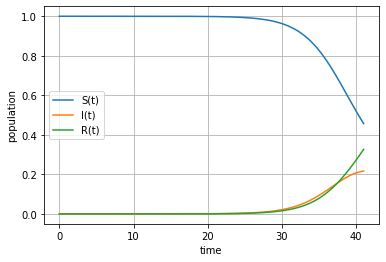

In [ ]:
# Plotting
plt.plot(tc,S_t, label = "S(t)")
plt.plot(tc,I_t, label = "I(t)")
plt.plot(tc,R_t, label = "R(t)")
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("population")
plt.show()

In [ ]:
S_test = np.hstack((S_t1,S_t2,S_t3,S_t4))
I_test = np.hstack((I_t1,I_t2,I_t3,I_t4))
I_test.shape

(20000,)

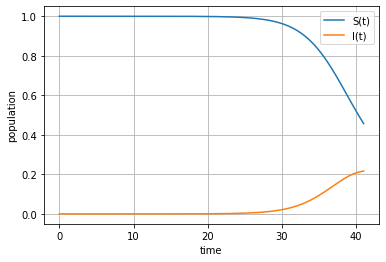

In [ ]:
# Plotting
plt.plot(tc,S_test, label = "S(t)")
plt.plot(tc,I_test, label = "I(t)")
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("population")
plt.show()

In [ ]:
# Convert To Tensor
tc = tf.convert_to_tensor(tc.astype('float32'))
t1 = tf.convert_to_tensor(t1.astype('float32'))
t2 = tf.convert_to_tensor(t2.astype('float32'))
t3 = tf.convert_to_tensor(t3.astype('float32'))
t4 = tf.convert_to_tensor(t4.astype('float32'))

In [ ]:
# Convert To Tensor
S_t = tf.convert_to_tensor(S_t.astype('float32'))
S_t1 = tf.convert_to_tensor(S_t1.astype('float32'))
S_t2 = tf.convert_to_tensor(S_t2.astype('float32'))
S_t3 = tf.convert_to_tensor(S_t3.astype('float32'))
S_t4 = tf.convert_to_tensor(S_t4.astype('float32'))

In [ ]:
# Convert To Tensor
I_t = tf.convert_to_tensor(I_t.astype('float32'))
I_t1 = tf.convert_to_tensor(I_t1.astype('float32'))
I_t2 = tf.convert_to_tensor(I_t2.astype('float32'))
I_t3 = tf.convert_to_tensor(I_t3.astype('float32'))
I_t4 = tf.convert_to_tensor(I_t4.astype('float32'))

In [ ]:
o=np.ones((5000,1)).astype('float32')
o=tf.convert_to_tensor(o)
o

<tf.Tensor: shape=(5000, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
class Custom_model1(Model):
    
    def __init__(self, **kwargs):
        super(Custom_model1, self).__init__(**kwargs)
        self.layer1 = Dense(100, activation='selu',name='layer1')
        self.layer2 = Dense(100, activation='selu',name='layer2')
        self.layer3 = Dense(100, activation='selu',name='layer3')
        self.layer4 = Dense(100, activation='selu',name='layer4')
        self.layer5 = Dense(100, activation='selu',name='layer5')
        self.layer6 = Dense(100, activation='selu',name='layer6')
        self.layer7 = Dense(100, activation='selu',name='layer7')
        self.layer8 = Dense(100, activation='selu',name='layer8')
        self.layer9 = Dense(100, activation='selu',name='layer9')
        self.layer10 = Dense(2, activation=None,name='layer10')
        self.layer11 = Dense(1, activation=None,use_bias=False)

    def call(self, t, o):
        z = self.layer1(t)
        z = self.layer2(z)
        z = self.layer3(z)
        z = self.layer4(z)
        z = self.layer5(z)
        z = self.layer6(z)
        z = self.layer7(z)
        z = self.layer8(z)
        z = self.layer9(z)
        z = self.layer10(z)
        z1 = self.layer11(o)
        return z,z1

In [ ]:
model = Custom_model1()

In [ ]:
y,_ = model(tc,o)
print(y)

tf.Tensor(
[[ 0.0000000e+00  0.0000000e+00]
 [-7.9205614e-03  1.5840973e-03]
 [-1.5675632e-02  3.1558857e-03]
 ...
 [ 4.7298044e-02  2.8667774e+00]
 [ 4.7309577e-02  2.8668551e+00]
 [ 4.7321960e-02  2.8669348e+00]], shape=(20000, 2), dtype=float32)


In [ ]:
model.layer11.trainable_weights

[<tf.Variable 'custom_model1/dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.2277124]], dtype=float32)>]

In [ ]:
model.summary()

Model: "custom_model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               multiple                  200       
_________________________________________________________________
layer2 (Dense)               multiple                  10100     
_________________________________________________________________
layer3 (Dense)               multiple                  10100     
_________________________________________________________________
layer4 (Dense)               multiple                  10100     
_________________________________________________________________
layer5 (Dense)               multiple                  10100     
_________________________________________________________________
layer6 (Dense)               multiple                  10100     
_________________________________________________________________
layer7 (Dense)               multiple                

In [ ]:
def loss(model, S_t_train, I_t_train, t_train, o, training):
    y,_ = model(t_train, o, training = training)
    S_pred = y[:,0]
    I_pred = y[:,1]
    with tf.GradientTape(persistent = True) as t1:
        t1.watch(t_train)
        y,beta = model(t_train, o)
        S = y[:,0]
        I = y[:,1]
    dS_dt = t1.gradient(S, t_train)
    dI_dt = t1.gradient(I, t_train)
    f_pred = dS_dt + (beta*S*I) 
    g_pred = dI_dt - (beta*S*I) + 0.25*I  
    return tf.reduce_mean(tf.square(S_t_train - S_pred)) + tf.reduce_mean(tf.square(I_t_train - I_pred)) + tf.reduce_mean(tf.square(f_pred)) + tf.reduce_mean(tf.square(g_pred))

In [ ]:
loss(model, S_t3, I_t3, t3, o, training=True)

<tf.Tensor: shape=(), dtype=float32, numpy=7.314896>

In [ ]:
model.layer11.trainable_variables

[<tf.Variable 'custom_model1/dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.2277124]], dtype=float32)>]

In [ ]:
def train(model, S_t_train, I_t_train, t_train, o):
    with tf.GradientTape() as t:
        current_loss = loss(model, S_t_train, I_t_train, t_train, o, training=True)
    grads = t.gradient(current_loss, model.trainable_variables)
    return current_loss, grads

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
epoch=[]
loss_plot=[]
model = Custom_model1()
ne=4000
for i in range(ne):
    loss_avg = tf.keras.metrics.Mean()
    c_l,grad=train(model, S_t3, I_t3, t3, o)
    optimizer.apply_gradients((grad, var) for (grad, var) in zip(grad, model.trainable_variables) if grad is not None)
    loss_avg.update_state(c_l)
  
    if i%100==0:
      epoch.append(i)
      loss_plot.append(loss_avg.result())
      print(loss_avg.result())

tf.Tensor(2.8736553, shape=(), dtype=float32)
tf.Tensor(0.030943481, shape=(), dtype=float32)
tf.Tensor(0.021594899, shape=(), dtype=float32)
tf.Tensor(0.015301203, shape=(), dtype=float32)
tf.Tensor(0.013689881, shape=(), dtype=float32)
tf.Tensor(0.013471699, shape=(), dtype=float32)
tf.Tensor(0.013417418, shape=(), dtype=float32)
tf.Tensor(0.013378225, shape=(), dtype=float32)
tf.Tensor(0.0133417575, shape=(), dtype=float32)
tf.Tensor(0.01331196, shape=(), dtype=float32)
tf.Tensor(0.013286947, shape=(), dtype=float32)
tf.Tensor(0.013266504, shape=(), dtype=float32)
tf.Tensor(0.013249922, shape=(), dtype=float32)
tf.Tensor(0.013236642, shape=(), dtype=float32)
tf.Tensor(0.013225086, shape=(), dtype=float32)
tf.Tensor(0.013214684, shape=(), dtype=float32)
tf.Tensor(0.013205414, shape=(), dtype=float32)
tf.Tensor(0.013196307, shape=(), dtype=float32)
tf.Tensor(0.013180941, shape=(), dtype=float32)
tf.Tensor(0.013165867, shape=(), dtype=float32)
tf.Tensor(0.013151197, shape=(), dtype=flo

In [ ]:
model.layer11.trainable_variables

In [ ]:
# Plotting loss v/s epoch'
x_plot=epoch
y_plot=loss_plot
plt.plot(x_plot,y_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
y,_ = model(t3,o)

In [ ]:
S_pred=y[:,0]

In [ ]:
plt.plot(t3,S_t3, label = "S(t) Original")
plt.plot(t3,S_pred, label = "Prediction")
plt.grid()
plt.legend()
plt.show()